<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/module_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 9: Base-N and Binary

Decimal System: this system is represented by 10 numbers from 0 to 9 with each digit represents the coefcient for a power of 10.

Any other systems could be created the same way

In [78]:
# 165.47（Base 10）
165.47 == 1*(10**2) + 6*(10**1) + 5*(10**0) + 4*(10**-1) + 7*(10**-2)

True

In [79]:
# Now we write the comparision of 141(base 10) with 12020(base 3)
1*(10**2) + 4*(10**1) + 1*(10**0) == 1*(3**4) + 2*(3**3) + 0*(3**2) + 2*(3**1) + 0*(3**0)

True

In [80]:
# similarly, we check base 12 (base 10) with 1100 (base 2)
1*(10**1)+2*(10**0) == 1*(2**3)+1*(2**2)+0*(2**1)+0*(2**0)

True

In [81]:
#Now we do additions in binary and base 10
#base 10: 11+12=23
#base 2: 1011+1100=10111
sum = 10111
23 == 1*(2**4) + 0*(2**3) + 1*(2**2) + 1*(2**1) + 1*(2**0)

True

In [82]:
#Now we do multiplcation in binary and base 10
#base 10: 11*12=132
#base 2: 1011*1100=10000100
multiplcation = 10000100
132 == 1*(2**7)+0*(2**6)+0*(2**5)+0*(2**4)+0*(2**3)+1*(2**2)+0*(2**1)+0*(2**0)

True

Fixed number that the computer can store.

In [83]:
sum = 0
for i in range(32):
  sum += 2**i
print(sum)

4294967295


9.2 Floating point numbers

In [84]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Floats allocate to three different parts: the sign indicator, characteristic or exponent, and fraction.
n = (-1)^s (2^(e-1023)) (1 + f)

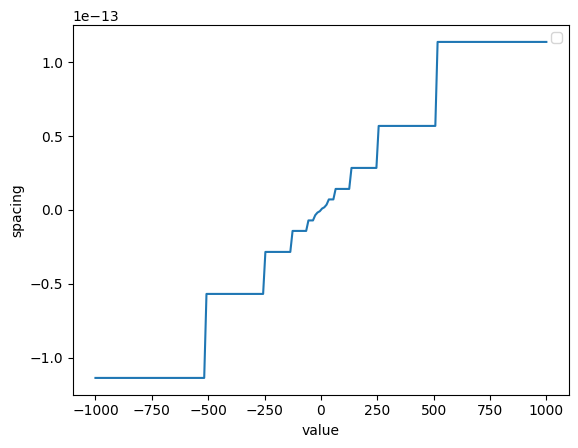

In [85]:
import numpy as np
import matplotlib.pyplot as plt
# now let's check the divergence of the system from -1000 to 1000
x = np.linspace(-1000, 1000, 200)
y = np.spacing(x)
plt.plot(x,y)
plt.xlabel('value')
plt.ylabel('spacing')
plt.legend()

In [86]:
np.spacing(1e5) # the spacing at  1e5

1.4551915228366852e-11

In [87]:
# if we add the value between spacing, then the value stays the same
1e5 == (1e5 + np.spacing(1e5)/2)

True

We now play with the smalleest and largest number in python

In [88]:
smallest = (2**(1-1023))*(1+0)
#largest = (2**(2046-1023))*((1+sum(0.5**np.arange(1, 53)))) # the largest number
print(smallest)

2.2250738585072014e-308


In [89]:
print(sys.float_info.max)
print(sys.float_info.min)

1.7976931348623157e+308
2.2250738585072014e-308


In [90]:
#adding two max numbers gives infinity
sys.float_info.max + sys.float_info.max

inf

In [91]:
# adding with any number to the biggest number will still be the same number
sys.float_info.max + 10 == sys.float_info.max

True

In [92]:
# if we go smaller than 2**(-1075), we will get 0
2**(-1078)

0.0

9.3. Round-off errors

In [93]:
5.1-4.845, 5.1 - 4.845 == 0.255 # we see that this is not true in computation due to round off error

(0.2549999999999999, False)

In [94]:
20/3 # we can also see it in fraction

6.666666666666667

In [95]:
0.1 + 0.2 + 0.4 ,0.1 + 0.2 + 0.4 == 0.7 #adding also gives an error accumulated

(0.7000000000000001, False)

In [96]:
 2 + 1/3 - 1/3 # this will not be a problem if we only do it once

2.0

In [97]:
def add_and_subtract(iterations):
  result = 1
  for i in range(iterations):
    result += 1/3
  for i in range(iterations):
    result -= 1/3
  return result
# if we do this so many times, we will see an accumulation of errors
add_and_subtract(100)

1.0000000000000002

In [98]:
add_and_subtract(5000) #more

0.9999999999998916

In [99]:
x = np.linspace(500,5000,10) # test the divergence
print(x)
y = []
for i in x:
  k = add_and_subtract(int(i))
  y.append(k)

[ 500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000.]


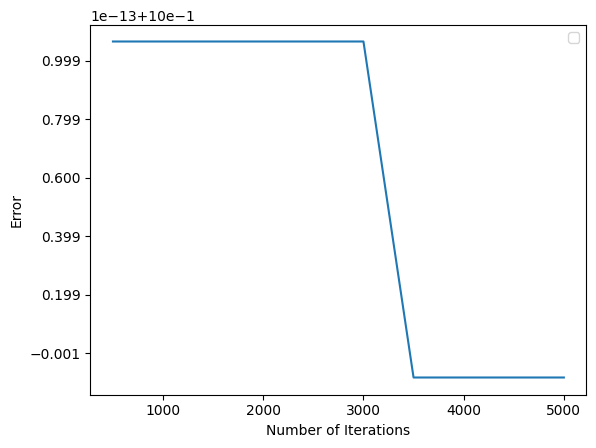

In [100]:
plt.plot(x,y)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.legend()